**Business Analytics and Data Visualization**

Prof Jose Mendoza

Chapter 6 - Exercise 4

File: nestegg_r.csv



> Note: This notebook assumes that the file breakfast.csv is located in Google Drive, in a folder named 'Data'. *



In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Read data file from the Data folder

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Data/nestegg_r.csv')
df.head()

In [ ]:
# Describe the dataset
df.describe()

,Age,Income
count,44.000000,44.000000
mean,45.590909,63698.840909
std,12.996096,20759.377437
min,22.000000,25281.000000
25%,34.000000,52342.750000
50%,44.000000,61885.500000
75%,60.000000,77483.500000
max,62.000000,105923.000000


In [ ]:
# Remove any missing values
df.dropna(inplace=True)


**Transforming the data**

Use the StandardScaler function from Sklearn

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
X

array([[-1.83621641, -1.84819315],
       [-1.75838065, -1.74903185],
       [-1.60270912, -1.8720211 ],
       [-1.36920184, -1.70264288],
       [-1.05785878, -1.54495937],
       [-1.21353031, -1.73904263],
       [-1.36920184, -0.06304616],
       [-1.13569455, -0.55032526],
       [-0.90218726, -0.56245851],
       [-0.66867997, -0.56245851],
       [-0.35733691, -0.56245851],
       [-0.12382962, -0.50184099],
       [ 0.26534919, -0.44117475],
       [ 0.34318496, -0.11367446],
       [ 0.26534919,  0.34724284],
       [ 0.10967767,  0.65047662],
       [-0.12382962,  0.79602689],
       [-0.12382962,  0.39577584],
       [-0.35733691,  0.18955932],
       [-0.5908442 ,  0.11675982],
       [-0.82435149,  0.00760931],
       [-1.13569455, -0.13794096],
       [-0.98002302, -0.25922473],
       [-0.90218726, -0.3805085 ],
       [-0.51300844, -0.33202423],
       [-0.27950115, -0.23495823],
       [-0.12382962, -0.01665719],
       [ 0.10967767, -0.18647396],
       [ 0.96587106,

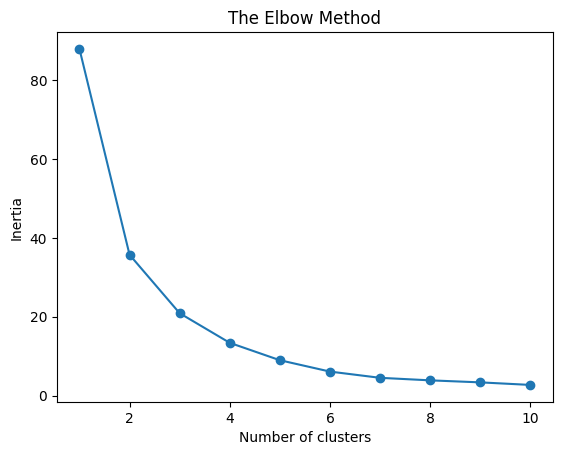

In [ ]:
# Use the Elbow method to find the optimum number of clusters
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs, '-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Based on the previous plot, we recommend using k = 3

In [ ]:
# Apply kmeans clustering
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [ ]:
# Visualize in a cluster
df['kmeans_3'] = kmeans.labels_
df

,Age,Income,kmeans_3
0,22,25770,2
1,23,27805,2
2,25,25281,2
3,28,28757,2
4,32,31993,2
5,30,28010,2
6,28,62405,1
7,31,52405,1
8,34,52156,1
9,37,52156,1


<function matplotlib.pyplot.show(close=None, block=None)>

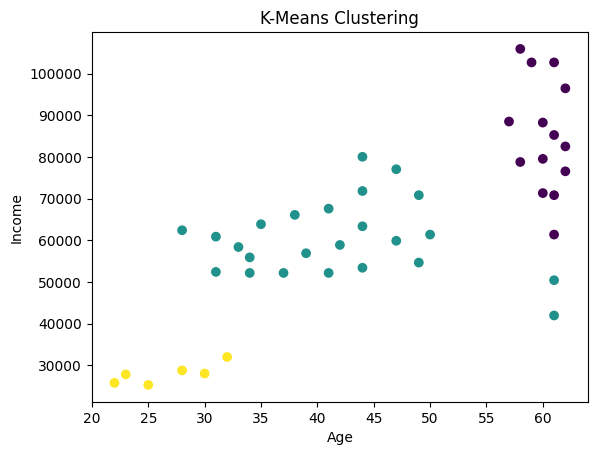

In [ ]:
# Visualize the data
plt.scatter(df['Age'], df['Income'], c=df['kmeans_3'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('K-Means Clustering')
plt.show

In [ ]:
# Calculate the mean 'Age' and mean 'Income' for each 'kmeans_3'

df.groupby('kmeans_3')[['Age', 'Income']].mean()


,Age,Income
kmeans_3,,
0,41.833333,60185.333333
1,60.142857,85048.928571
2,26.666667,27936.000000
